In [403]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [404]:
df = pd.read_csv('flats.csv', delimiter=',')
df

,Id,SQUARE_METERS,METRO_DISTANCE,PRICE
0,601,28,677,7328400
1,602,54,120,9754600
2,603,43,1344,6781500
3,604,33,1003,6784100
4,605,30,591,7296200
...,...,...,...,...
95,696,28,2073,4826700
96,697,63,2120,6800800
97,698,33,1411,6517500
98,699,47,1715,6812100


#### Проверим, что данные не содержать пропусков

In [405]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Id                0
SQUARE_METERS     0
METRO_DISTANCE    0
PRICE             0
dtype: int64

#  Модели  для прогнозирования цены квартир на основе количества квадратных метров


#### Обучающая выборка 0

In [406]:
X_square_meters_0 = pd.DataFrame(df[df['Id'] % 5 != 0]['SQUARE_METERS'])
y_0 = pd.DataFrame(df[df['Id'] % 5 != 0]['PRICE'])

# тестовая выборка 0
X_square_meters_test_0 = pd.DataFrame(df[df['Id'] % 5 == 0]['SQUARE_METERS'])
y_test_0 = pd.DataFrame(df[df['Id'] % 5 == 0]['PRICE'])

# обучение
model0 = LinearRegression()
model0.fit(X_square_meters_0, y_0)

# тест
model0.score(X_square_meters_test_0, y_test_0)

0.5616015128375316

#### Обучающая выборка 1

In [407]:
X_square_meters_1 = pd.DataFrame(df[df['Id'] % 5 != 1]['SQUARE_METERS'])
y_1 = pd.DataFrame(df[df['Id'] % 5 != 1]['PRICE'])

# тестовая выборка 1
X_square_meters_test_1 = pd.DataFrame(df[df['Id'] % 5 == 1]['SQUARE_METERS'])
y_test_1 = pd.DataFrame(df[df['Id'] % 5 == 1]['PRICE'])

# обучение
model1 = LinearRegression()
model1.fit(X_square_meters_1, y_1)

# тест
model1.score(X_square_meters_test_1, y_test_1)

0.345115071153397

#### Обучающая выборка 2

In [408]:
X_square_meters_2 = pd.DataFrame(df[df['Id'] % 5 != 2]['SQUARE_METERS'])
y_2 = pd.DataFrame(df[df['Id'] % 5 != 2]['PRICE'])

# тестовая выборка 2
X_square_meters_test_2 = pd.DataFrame(df[df['Id'] % 5 == 2]['SQUARE_METERS'])
y_test_2 = pd.DataFrame(df[df['Id'] % 5 == 2]['PRICE'])

# обучение
model2 = LinearRegression()
model2.fit(X_square_meters_2, y_2)

# тест
model2.score(X_square_meters_test_2, y_test_2)

0.3573063734113485

#### обучающая выборка 3

In [409]:
X_square_meters_3 = pd.DataFrame(df[df['Id'] % 5 != 3]['SQUARE_METERS'])
y_3 = pd.DataFrame(df[df['Id'] % 5 != 3]['PRICE'])

# тестовая выборка 3
X_square_meters_test_3 = pd.DataFrame(df[df['Id'] % 5 == 3]['SQUARE_METERS'])
y_test_3 = pd.DataFrame(df[df['Id'] % 5 == 3]['PRICE'])

# обучение
model3 = LinearRegression()
model3.fit(X_square_meters_3, y_3)

# тест
model3.score(X_square_meters_test_3, y_test_3)

0.4409671483711033

#### обучающая выборка 4

In [410]:
X_square_meters_4 = pd.DataFrame(df[df['Id'] % 5 != 4]['SQUARE_METERS'])
y_4 = pd.DataFrame(df[df['Id'] % 5 != 4]['PRICE'])

# тестовая выборка 4
X_square_meters_test_4 = pd.DataFrame(df[df['Id'] % 5 == 4]['SQUARE_METERS'])
y_test_4 = pd.DataFrame(df[df['Id'] % 5 == 4]['PRICE'])

# обучение
model4 = LinearRegression()
model4.fit(X_square_meters_4, y_4)

# тест
model4.score(X_square_meters_test_4, y_test_4)

0.45990627071897305

### Обучение и тест на всех данных

In [411]:
# обучающая выборка 
X_square_meters = pd.DataFrame(df['SQUARE_METERS'])
y = pd.DataFrame(df['PRICE'])

# обучение
model = LinearRegression()
model.fit(X_square_meters, y)

# тест
model.score(X_square_meters, y)

0.45222058564965084

In [412]:
coef_0 = pd.DataFrame(zip(['intercept'] + X_square_meters.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef_0

,predictor,coef
0,intercept,[4292935.814524662]
1,SQUARE_METERS,[62148.729304720386]


### Прогнозные значения

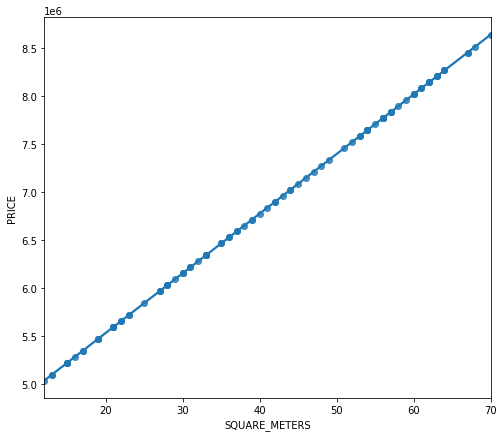

In [413]:
data_0 = pd.DataFrame(df['SQUARE_METERS'] * coef_0['coef'][1][0] + coef_0['coef'][0][0]).rename(columns={'SQUARE_METERS': 'PRICE'})
data_0['SQUARE_METERS'] = df['SQUARE_METERS']

fig, ax = plt.subplots(1, 1, figsize = (8, 7))
sns.regplot(x=data_0['SQUARE_METERS'], y=data_0['PRICE'], fit_reg=True)
plt.show()

### Настоящие значения

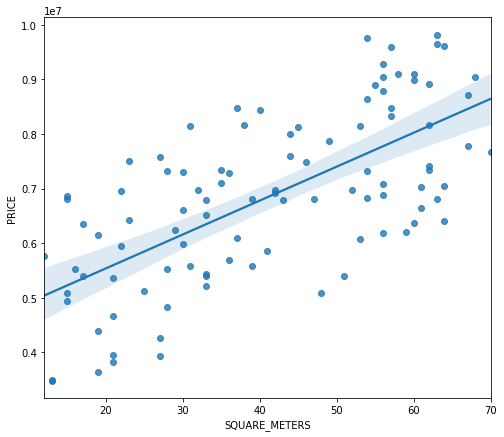

In [415]:
fig, ax = plt.subplots(1, 1, figsize = (8, 7))
sns.regplot(x=df['SQUARE_METERS'], y=df['PRICE'], fit_reg=True)
plt.show()

### Метрики качества

In [416]:
# MAE (Mean absolute error)
MAE = 0
for i in range(len(data_1)):
    MAE += abs(df['PRICE'][i] - (df['SQUARE_METERS'][i] * coef_0['coef'][1][0] + coef_0['coef'][0][0]))
MAE = MAE / len(data_1)

#RMSE ((Root Mean Square Error)
RMSE = 0
for i in range(len(data_1)):
    RMSE += (df['PRICE'][i] - (df['SQUARE_METERS'][i] * coef_0['coef'][1][0] + coef_0['coef'][0][0])) ** 2
RMSE = ((RMSE / len(data_1)) ** 0.5)

# MAPE (Mean absolute percentage error)
MAPE = 0
for i in range(len(data_1)):
    MAPE += (abs(df['PRICE'][i] - (df['SQUARE_METERS'][i] * coef_0['coef'][1][0] + coef_0['coef'][0][0])) / df['PRICE'][i])
MAPE = (MAPE / len(data_1)) * 100

# MAD (Median absolute deviation)
MAD = 0
for i in range(len(data_1)):
    MAD += abs(df['PRICE'].mean() - df['SQUARE_METERS'][i] * coef_0['coef'][1][0] + coef_0['coef'][0][0])
MAD = MAD / len(data_1)

# R^2 (coefficient of determination)
# difference between actual value and mean
act_mean = 0
# difference between predicted value and mean
pred_mean = 0
RR = 0
for i in range(len(data_1)):
    act_mean += (df['PRICE'].mean() - df['PRICE'][i]) ** 2
    pred_mean += (df['PRICE'].mean() - (df['SQUARE_METERS'][i] * coef_0['coef'][1][0] + coef_0['coef'][0][0])) ** 2
RR = pred_mean / act_mean

# Theil inequality coefficient
thiel = 0
act = 0
pred = 0
act_pred = 0
for i in range(len(data_1)):
    act_pred += (df['PRICE'][i] - (df['SQUARE_METERS'][i] * coef_0['coef'][1][0] + coef_0['coef'][0][0])) ** 2
    act += df['PRICE'][i] ** 2
    pred += (df['SQUARE_METERS'][i] * coef_0['coef'][1][0] + coef_0['coef'][0][0]) ** 2
thiel = (act_pred / (act + pred)) ** 0.5

quality_metrics = pd.DataFrame({'quality metrics': ['MAE', 'RMSE', 'MAPE', 'MAD', 'R^2', 'Theil inequality coef'], 
                                'value': [MAE, RMSE, MAPE, MAD, RR, thiel]})
quality_metrics

,quality metrics,value
0,MAE,9.902619e+05
1,RMSE,1.141985e+06
2,MAPE,1.569379e+01
3,MAD,8.585872e+06
4,R^2,4.522206e-01
5,Theil inequality coef,1.157447e-01


# Модели  для прогнозирования цены квартир на основе расстояния до метро

#### обучающая выборка 0

In [417]:
X_metro_distance_0 = pd.DataFrame(df[df['Id'] % 5 != 0]['METRO_DISTANCE'])
y_0 = pd.DataFrame(df[df['Id'] % 5 != 0]['PRICE'])

# тестовая выборка 0
X_metro_distance_test_0 = pd.DataFrame(df[df['Id'] % 5 == 0]['METRO_DISTANCE'])
y_test_0 = pd.DataFrame(df[df['Id'] % 5 == 0]['PRICE'])

# обучение
model0 = LinearRegression()
model0.fit(X_metro_distance_0, y_0)

# тест
model0.score(X_metro_distance_test_0, y_test_0)

0.6232654880930808

#### обучающая выборка 1

In [418]:
X_metro_distance_1 = pd.DataFrame(df[df['Id'] % 5 != 1]['METRO_DISTANCE'])
y_1 = pd.DataFrame(df[df['Id'] % 5 != 1]['PRICE'])

# тестовая выборка 1
X_metro_distance_test_1 = pd.DataFrame(df[df['Id'] % 5 == 1]['METRO_DISTANCE'])
y_test_1 = pd.DataFrame(df[df['Id'] % 5 == 1]['PRICE'])

# обучение
model1 = LinearRegression()
model1.fit(X_metro_distance_1, y_1)

# тест
model1.score(X_metro_distance_test_1, y_test_1)

0.5076563029563235

#### обучающая выборка 2

In [419]:
X_metro_distance_2 = pd.DataFrame(df[df['Id'] % 5 != 2]['METRO_DISTANCE'])
y_2 = pd.DataFrame(df[df['Id'] % 5 != 2]['PRICE'])

# тестовая выборка 2
X_metro_distance_test_2 = pd.DataFrame(df[df['Id'] % 5 == 2]['METRO_DISTANCE'])
y_test_2 = pd.DataFrame(df[df['Id'] % 5 == 2]['PRICE'])

# обучение
model2 = LinearRegression()
model2.fit(X_metro_distance_2, y_2)

# тест
model2.score(X_metro_distance_test_2, y_test_2)

0.5163214731577123

#### обучающая выборка 3

In [420]:
X_metro_distance_3 = pd.DataFrame(df[df['Id'] % 5 != 3]['METRO_DISTANCE'])
y_3 = pd.DataFrame(df[df['Id'] % 5 != 3]['PRICE'])

# тестовая выборка 3
X_metro_distance_test_3 = pd.DataFrame(df[df['Id'] % 5 == 3]['METRO_DISTANCE'])
y_test_3 = pd.DataFrame(df[df['Id'] % 5 == 3]['PRICE'])

# обучение
model3 = LinearRegression()
model3.fit(X_metro_distance_3, y_3)

# тест
model3.score(X_metro_distance_test_3, y_test_3)

0.6576872991464785

#### обучающая выборка 4

In [421]:
X_metro_distance_4 = pd.DataFrame(df[df['Id'] % 5 != 4]['METRO_DISTANCE'])
y_4 = pd.DataFrame(df[df['Id'] % 5 != 4]['PRICE'])

# тестовая выборка 4
X_metro_distance_test_4 = pd.DataFrame(df[df['Id'] % 5 == 4]['METRO_DISTANCE'])
y_test_4 = pd.DataFrame(df[df['Id'] % 5 == 4]['PRICE'])

# обучение
model4 = LinearRegression()
model4.fit(X_metro_distance_4, y_4)

# тест
model4.score(X_metro_distance_test_4, y_test_4)

0.49675638977515557

### Обучение и тест на всех данных

In [422]:
# обучающая выборка 
X_metro_distance = pd.DataFrame(df['METRO_DISTANCE'])
y = pd.DataFrame(df['PRICE'])

# обучение
model = LinearRegression()
model.fit(X_metro_distance, y)

# тест
model.score(X_metro_distance, y)

0.5775983380546676

In [423]:
coef_1 = pd.DataFrame(zip(['intercept'] + X_metro_distance.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef_1

,predictor,coef
0,intercept,[9003176.445034346]
1,METRO_DISTANCE,[-1679.0309690928532]


### Прогнозные значения

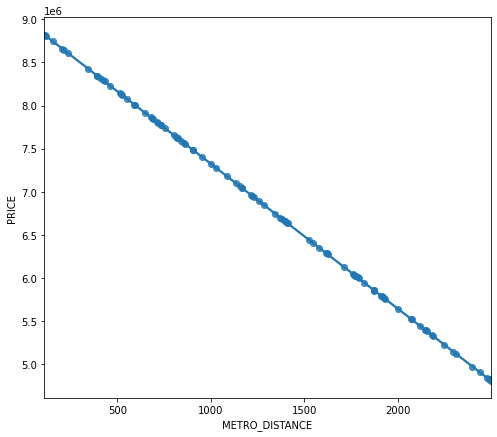

In [424]:
data_1 = pd.DataFrame(df['METRO_DISTANCE'] * coef_1['coef'][1][0] + coef_1['coef'][0][0]).rename(columns={'METRO_DISTANCE': 'PRICE'})
data_1['METRO_DISTANCE'] = df['METRO_DISTANCE']

fig, ax = plt.subplots(1, 1, figsize = (8, 7))
sns.regplot(x=data_1['METRO_DISTANCE'], y=data_1['PRICE'], fit_reg=True)
plt.show()

### Настоящие значения

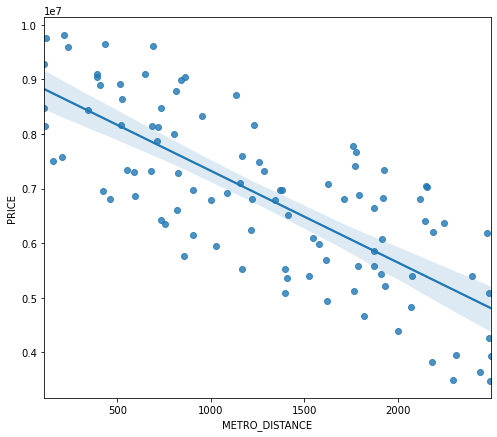

In [425]:
fig, ax = plt.subplots(1, 1, figsize = (8, 7))
sns.regplot(x=df['METRO_DISTANCE'], y=df['PRICE'], fit_reg=True)
plt.show()

### Метрики качества


In [426]:
# MAE (Mean absolute error)
MAE = 0
for i in range(len(data_1)):
    MAE += abs(df['PRICE'][i] - (df['METRO_DISTANCE'][i] * coef_1['coef'][1][0] + coef_1['coef'][0][0]))
MAE = MAE / len(data_1)

#RMSE ((Root Mean Square Error)
RMSE = 0
for i in range(len(data_1)):
    RMSE += (df['PRICE'][i] - (df['METRO_DISTANCE'][i] * coef_1['coef'][1][0] + coef_1['coef'][0][0])) ** 2
RMSE = ((RMSE / len(data_1)) ** 0.5)

# MAPE (Mean absolute percentage error)
MAPE = 0
for i in range(len(data_1)):
    MAPE += (abs(df['PRICE'][i] - (df['METRO_DISTANCE'][i] * coef_1['coef'][1][0] + coef_1['coef'][0][0])) / df['PRICE'][i])
MAPE = (MAPE / len(data_1)) * 100

# MAD (Median absolute deviation)
MAD = 0
for i in range(len(data_1)):
    MAD += abs(df['PRICE'].mean() - df['METRO_DISTANCE'][i] * coef_1['coef'][1][0] + coef_1['coef'][0][0])
MAD = MAD / len(data_1)

# R^2 (coefficient of determination)
# difference between actual value and mean
act_mean = 0
# difference between predicted value and mean
pred_mean = 0
RR = 0
for i in range(len(data_1)):
    act_mean += (df['PRICE'].mean() - df['PRICE'][i]) ** 2
    pred_mean += (df['PRICE'].mean() - (df['METRO_DISTANCE'][i] * coef_1['coef'][1][0] + coef_1['coef'][0][0])) ** 2
RR = pred_mean / act_mean

# Theil inequality coefficient
thiel = 0
act = 0
pred = 0
act_pred = 0
for i in range(len(data_1)):
    act_pred += (df['PRICE'][i] - (df['METRO_DISTANCE'][i] * coef_1['coef'][1][0] + coef_1['coef'][0][0])) ** 2
    act += df['PRICE'][i] ** 2
    pred += (df['METRO_DISTANCE'][i] * coef_1['coef'][1][0] + coef_1['coef'][0][0]) ** 2
thiel = (act_pred / (act + pred)) ** 0.5

quality_metrics = pd.DataFrame({'quality metrics': ['MAE', 'RMSE', 'MAPE', 'MAD', 'R^2', 'Theil inequality coef'], 
                                'value': [MAE, RMSE, MAPE, MAD, RR, thiel]})
quality_metrics

,quality metrics,value
0,MAE,8.706052e+05
1,RMSE,1.002814e+06
2,MAPE,1.378039e+01
3,MAD,1.800635e+07
4,R^2,5.775983e-01
5,Theil inequality coef,1.014836e-01


# Модели  для прогнозирования цены квартир на основе количества квадратных метров и расстояния до метро

In [427]:
X = df.drop('PRICE', axis=1).drop('Id', axis=1)
y = pd.DataFrame(df['PRICE'])

model = LinearRegression()
model.fit(X, y)

# тест
model.score(X, y)

0.9774581227423352